<a href="https://colab.research.google.com/github/osho-m/2D-CNN/blob/main/CIFAR_10_DATASET_2D_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CIFAR-10 DATASET -2D-CNN**

# Loading the libraries

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np, time
from datetime import timedelta
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping

# Loading the dataset

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


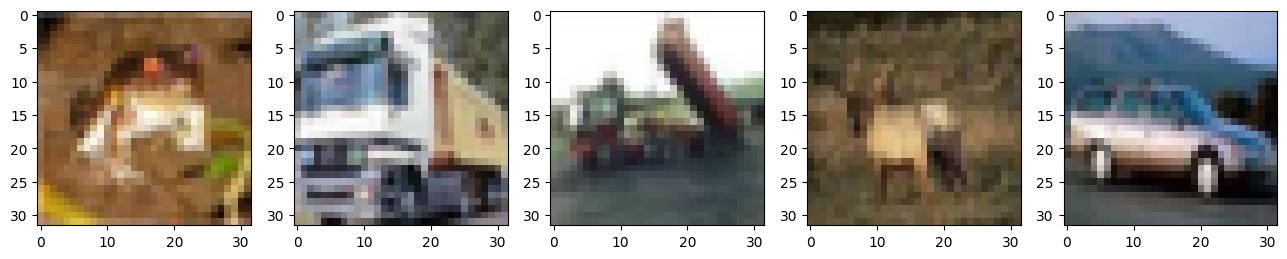

In [4]:
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))
f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)
for i in range(5):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()

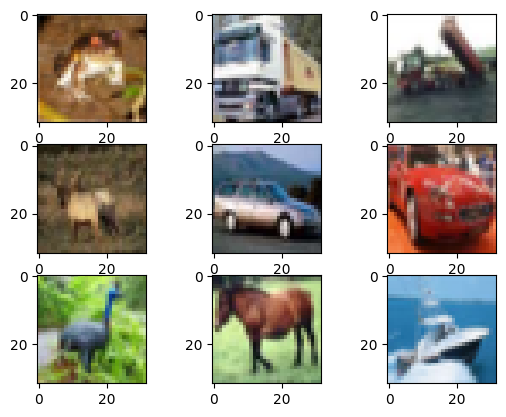

In [5]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i])
# show the figure
plt.show()

In [6]:
Y_train = to_categorical(y_train, num_classes=10)
Y_test = to_categorical(y_test, num_classes=10)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Shape of training data:")
print(X_train.shape)
print(Y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(Y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 10)
Shape of test data:
(10000, 32, 32, 3)
(10000, 10)


# Creating the model

In [7]:
#building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(70, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 25)        700       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 50)        11300     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 50)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 50)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 70)        31570     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 70)         0         
 2D)                                                    

# Compiling the model



In [8]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Training the Model

In [ ]:
checkpoint= ModelCheckpoint("./model/cifar10_epo_cnn.h5",monitor='val_accuracy', mode='max', save_best_only=True)
call_backs=[checkpoint]

t1=time.time()
history = model.fit(X_train, Y_train, batch_size=32, callbacks=call_backs,epochs=50,verbose=2, validation_split=0.2)
t2=time.time()
t=t2-t1

training_time=timedelta(seconds=t)
print('Training time : %s' % str(training_time))

In [ ]:
plt.style.use('bmh')
# Accuracy Curves
plt.plot(history.history['accuracy'],'b',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'g',linewidth=2.0)
plt.legend(['Training','Validation'],fontsize=12,frameon=True,loc='best')
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.grid(True)
plt.show()
plt.style.use('bmh')
# Loss Curves
plt.plot(history.history['loss'],'b',linewidth=2.0)
plt.plot(history.history['val_loss'],'g',linewidth=2.0)
plt.legend(['Training','Validation'],fontsize=12,frameon=True,loc='best')
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Loss',fontsize=14)
plt.grid(True)
plt.show()

In [13]:
model.save("./model/cifar10_epo_cnn.h5")
model.save_weights("./model/cifar10_epo_cnn_weights.h5")
print("Model Weights Saved...!")

Model Weights Saved...!


# Testing



# Import the libraries

In [ ]:
from keras.models import Sequential, load_model
from keras.preprocessing import image
import numpy as np
import os
from os import listdir
from os.path import isfile, join
from keras.preprocessing.image import ImageDataGenerator , load_img, img_to_array

# loading the model

In [15]:
model = load_model('./model/cifar10_epo_cnn.h5')
print("Model Loaded...!")

Model Loaded...!


# Declaring the variables

In [16]:
# dimensions of our images
img_width, img_height = 32,32
c1,c2,c3,c4,c5,c6,c7,c8,c9,c10 = 0,0,0,0,0,0,0,0,0,0
x = 100
i = 0
classes = {0: "Airplane", 1: "Automobile 	", 2: "Bird",
           3: "Cat", 4: "Deer", 5: "Dog", 6: "Frog",
           7: "Horse", 8: "Ship", 9: "Truck"}

In [17]:
for i in range(x):
    print("\n\n Feature shape[",i,"] :", X_test[i].shape)
    f = np.expand_dims(X_test[i],axis=0)
    ypred = model.predict(f)
    print("Result               :",ypred)
    out = int(np.argmax(ypred))  
    print("Detected index       :",out)
    ans = classes[out]
    print("Detected Class       :",ans)
    i += 1
    #print("Count                :",i,"\n")
    if out == 0: c1 +=1
    if out == 1: c2 +=1
    if out == 2: c3 +=1
    if out == 3: c4 +=1
    if out == 4: c5 +=1
    if out == 5: c6 +=1
    if out == 6: c7 +=1
    if out == 7: c8 +=1
    if out == 8: c9 +=1
    if out == 9: c10 +=1
if i>=x:
  print("\n CIFAR-10 testing using 2D CNN")
  print("\n Airplane \tAutomobile \tBird \tCat \tDeer \tDog \tFrog \tHorse \tShip \tTruck")
  print("  ",c1, "\t\t" , c2 ,"\t\t", c3 ,"\t" ,c4 ,"\t", c5,"\t",  c6,"\t",  c7,"\t",  c8,"\t",  c9,"\t",  c10,"\n")   
  print('No. of images tested - '+'{}'.format(i)+'.\n')



 Feature shape[ 0 ] : (32, 32, 3)
1/1 [==============================] - 0s 140ms/step
Result               : [[1.4581744e-04 9.9311237e-06 2.7781841e-04 6.5196562e-01 1.5981728e-04
  3.4237805e-01 3.6404002e-03 1.1065444e-03 2.7312170e-04 4.2841188e-05]]
Detected index       : 3
Detected Class       : Cat


 Feature shape[ 1 ] : (32, 32, 3)
1/1 [==============================] - 0s 31ms/step
Result               : [[6.3076419e-05 6.3252924e-03 7.4730244e-10 7.2583610e-09 1.5607040e-11
  1.6161492e-13 2.2483702e-11 3.7614653e-14 9.9358904e-01 2.2644557e-05]]
Detected index       : 8
Detected Class       : Ship


 Feature shape[ 2 ] : (32, 32, 3)
1/1 [==============================] - 0s 27ms/step
Result               : [[3.8223334e-02 7.8557283e-03 2.1594602e-03 2.4272669e-02 4.7536585e-03
  2.4380500e-03 4.3404184e-04 2.9209638e-03 8.9156401e-01 2.5378088e-02]]
Detected index       : 8
Detected Class       : Ship


 Feature shape[ 3 ] : (32, 32, 3)
1/1 [=============================